In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Problem 1

In [ ]:
dataframe= pd.read_csv("/content/drive/MyDrive/Human_Development_Index_Dataset.csv",encoding="ISO-8859-1")

#dataframe.head()
#dataframe.tail()
#dataframe.describe()

unique_year= dataframe["year"].unique()
#print(f"the unique years are {unique_year}")

hdi_2022_df= dataframe[dataframe['year']==2022]
#hdi_2022_df.head(10)


row= dataframe.shape[0]
coln= dataframe.shape[1]
#print(f"there are {row} row and {coln} coln in dataframe")


#print("\n Column names and types are:")
#print(hdi_2022_df.dtypes)
#print("total null values in each columns are:  ")
#print(hdi_2022_df.isnull().sum())



HDI_2022clean= hdi_2022_df.dropna(subset=['hdi'])
# print("dropped sucessfully")
print(f"After dropping rows with missing HDI {HDI_2022clean.shape}")

HDI_2022_clean_datas = HDI_2022clean.drop_duplicates()
print(f"after removing duplicates {HDI_2022_clean_datas.shape}")
#left








#Basic Statistics:
mean_2022_mean= HDI_2022_clean_datas['hdi'].mean()
mean_2022_median= HDI_2022_clean_datas['hdi'].median()
mean_2022_sd= HDI_2022_clean_datas['hdi'].std()
#print(f"the mean is {mean_2022_mean}")
#print(f"the median is {mean_2022_median}")
#print(f"the standard deviation is {mean_2022_sd}")

maxhdi= HDI_2022_clean_datas.loc[HDI_2022_clean_datas['hdi'].idxmax(), ["country"]]
# id max returns the largest value of the column
#print(f"country with the highest HDi is {maxhdi} ")

minhdi= HDI_2022_clean_datas.loc[HDI_2022_clean_datas['hdi'].idxmin(), ["country"]]
#print(f"country with the lowest HDi is {minhdi} ")


#5. Filtering and Sorting:
hdi_8data= HDI_2022_clean_datas[HDI_2022_clean_datas['hdi']>0.800]
#print(f"the country with hdi greater than 0.8 are \n : {hdi_8data.head(5)}")

sorted_value= hdi_8data.sort_values(by="gross_inc_percap", ascending=False)
#print(f"the sorted top 10 value are \n {sorted_value.head(10)}")


#6. Adding HDI Category Column:

def classify_hdi(hdi):
  if hdi<0.550 and hdi > 0:
    return "low"
  elif hdi <0.700 and  hdi>=0.550:
    return "Medium"
  elif hdi >=0.700 and  hdi>0.799:
    return "High"
  elif hdi>= 0.799:
    return "very High"


HDI_2022_clean_datas['Category']= HDI_2022_clean_datas['hdi'].apply(classify_hdi)
#.apply()  applies our classification to every row
total_values= HDI_2022_clean_datas['Category'].value_counts()
#.value_counts() shows how many countries per category
print(f"the values are \n{total_values}")
HDI_2022_clean_datas.to_csv('HDI category added.csv',index=False)

After dropping rows with missing HDI (204, 30)
after removing duplicates (204, 30)
the values are 
Category
High         71
Medium       44
low          35
very High     1
Name: count, dtype: int64


3.2 Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)

In [ ]:
df= dataframe[dataframe["year"].isin([2020,2021,2022])].copy()
#df.head(6)

df.to_csv("HDI problem1B.csv",index=False)

#2. Data Cleaning:
missing_values= df[['hdi','country','year']].isnull().sum()
print(f"there are total {missing_values} missing values ")

# dropping duplicates values
df= df.dropna(subset=['hdi','country','year'])

# removing duplicates
df= df.drop_duplicates()
#left






#3. Visualization Tasks:
# A. Line Chart — HDI Trend (Country-Level):
countries = ['India', 'Nepal', 'Andorra', 'Afghanistan', 'United States']
# data= df[df['country'].isin(countries)]
# plt.figure(figsize=(10,6))
# sns.lineplot(data=data, x='year', y='hdi', hue='country', marker='o')
# plt.title("HDI Trend 2020–2022")
# plt.legend()
# plt.xlabel("Year")
# plt.ylabel("HDI")
# plt.show()


#B. Generate Visualizations:
# grouping= df.groupby(['region','year'])['hdi'].mean()
# print(grouping)
#left


#– Box Plot: HDI Distribution for 2020, 2021, and 2022
# plt.figure(figsize=(8,6))
# sns.boxplot(data=df, x='year', y='hdi')
# plt.title("HDI Distribution 2020–2022")
# plt.show()

#– Scatter Plot: HDI vs. GNI per Capita
# if 'gross_inc_percap' in df:
#   plt.figure(figsize=(8,6))
#   sns.scatterplot(data= df,x='gross_inc_percap',y='hdi',marker='X')
#   sns.regplot(data= df,x='gross_inc_percap',y='hdi',scatter=False)  #prints scatter line only
#   plt.title("HDI vs GNI Per Capita")
#   plt.show();
# else:
#   print("GNI per captia is not available in dataset")


#4. Short Analysis Questions:
# Which countries show the greatest improvement in HDI from 2020 to 2022?
df_selected = df[df['country'].isin(countries)]


improvemt_country= df_selected.pivot_table(values='hdi',index='country',columns='year')
improvemt_country['change_hdi']= improvemt_country[2022]-improvemt_country[2020]
country=improvemt_country.sort_values(by='change_hdi',ascending=False).head(1)
print(f"greatest improvement in HDi from 2020 to 2022 is \n {country}")

# #Did any countries experience a decline in HDI? Provide possible reasons.
decline_country= improvemt_country[improvemt_country['change_hdi']<0]
print(f"decline country \n {decline_country.head()}")
# print("becuase GNI per captia is decreasing rapidly per year")
print("_________________________________________________________")
# #Which region has the highest and lowest average HDI across these three years?
region_stats = df.groupby('country')['hdi'].mean().sort_values()
print(f"country with the lowest mean HDi is {region_stats.head(1)}")
print(f"country with the lowest mean HDi is {region_stats.tail(1)}")

#Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends duringthis period.

#Between 2020 and 2022, global HDI trends were heavily shaped by the COVID‑19 pandemic.
#The crisis reduced life expectancy, disrupted education, and weakened economies, causing many countries to experience stagnation or decline in HDI. Recovery was uneven, with wealthier nations rebounding faster than developing ones. Additional challenges such as inflation, climate events, and regional conflicts also contributed to slower human development during this period.
# it  reduce life expectancy. it affects on education and also effect vast on GNI per capita.
# Many countries experienced negative or slow GNI growth, directly reducing HDI scores
#Education index dropped or stagnated in many countries, lowering overall HDI


there are total hdi        8
country    0
year       0
dtype: int64 missing values 
greatest improvement in HDi from 2020 to 2022 is 
 year      2020   2021   2022  change_hdi
country                                 
Andorra  0.843  0.855  0.884       0.041
decline country 
 year          2020   2021   2022  change_hdi
country                                     
Afghanistan  0.488  0.473  0.462      -0.026
_________________________________________________________
country with the lowest mean HDi is country
Somalia    0.38
Name: hdi, dtype: float64
country with the lowest mean HDi is country
Norway    0.964333
Name: hdi, dtype: float64


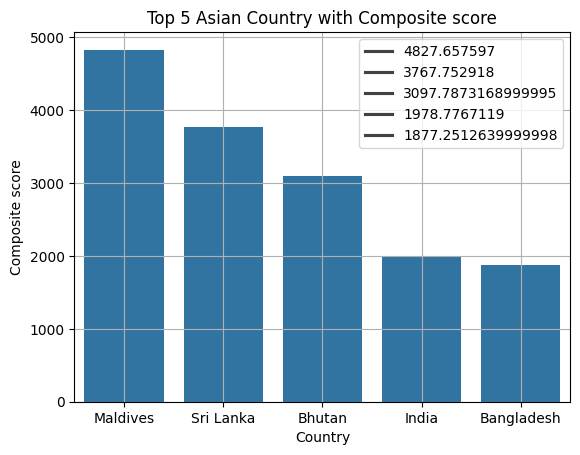

___________________________________________________________________________________
             HDi rank  Composite rank
country                              
Afghanistan       8.0             8.0
Bangladesh        4.0             5.0
Bhutan            3.0             3.0
India             5.0             4.0
Maldives          2.0             1.0
Nepal             6.0             7.0
Pakistan          7.0             6.0
Sri Lanka         1.0             2.0


In [ ]:
south_asianCountry= ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"]

HDI_SAC= df[df['country'].isin(south_asianCountry)].copy()
HDI_SAC.to_csv("HDI SouthAsia.csv", index=False)

#Composite Development Score:
HDI_SAC["Composite_Score"]= 0.3*HDI_SAC['life_expectancy']+0.3*HDI_SAC['gross_inc_percap']
ranking_country=  HDI_SAC.groupby("country")['Composite_Score'].mean().sort_values(ascending=False)
#print(f"ranking the data in Descending order \n {ranking_country}")


# plotting top 5 countries
#extracting top5 country
top5_Country= ranking_country.head(5)
# print(top5_Country)
sns.barplot(data=top5_Country)
plt.title("Top 5 Asian Country with Composite score")
plt.ylabel("Composite score")
plt.xlabel("Country")
plt.grid()
plt.legend(top5_Country)
plt.show()

print("___________________________________________________________________________________")
#Compare the ranking of countries by Composite Score with their HDI ranking and discuss any
#differences.
hdi_rank= HDI_SAC.groupby('country')['hdi'].mean().sort_values(ascending=False)
datas= pd.DataFrame({
    "HDi rank":hdi_rank.rank(ascending=False),
    "Composite rank":ranking_country.rank(ascending=False)
})

print(datas)


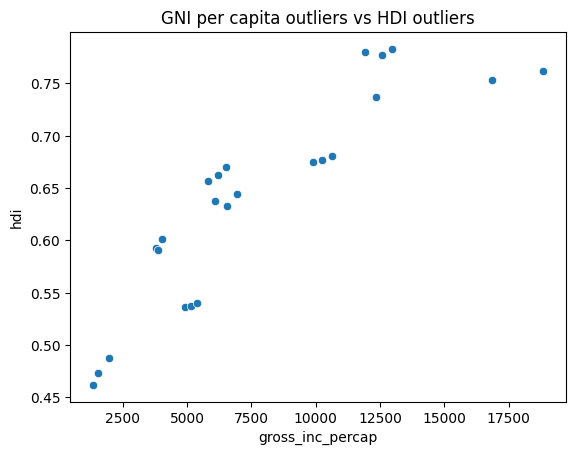

the correlation between hdi and gender_development is 0.8742
the correlation between hdi and life_expectancy is 0.9388


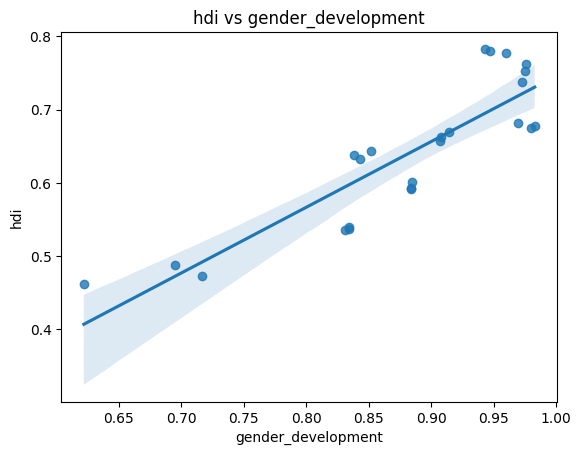

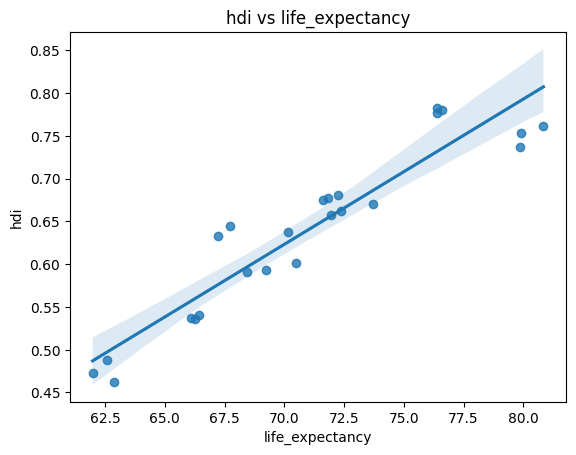

Life expectancy is the metric most strongly related to HDI because
it shows the highest Pearson correlation. Gender development shows the
 weakest relationship with HDI because its correlation value is lower


In [ ]:
#3. Outlier Detection:
Q1_hdi= HDI_SAC['hdi'].quantile(0.25)
Q3_hdi= HDI_SAC['hdi'].quantile(0.75)
IQR_hdi= Q3_hdi-Q1_hdi
LowerBound_hdi= Q1_hdi - 1.5 *IQR_hdi
UpperBound_hdi= Q3_hdi + 1.5 *IQR_hdi
hdi_outliers= HDI_SAC[(HDI_SAC['hdi']<LowerBound_hdi) | (HDI_SAC['hdi']<UpperBound_hdi) ]
#for gni outliers
Q1_gni= HDI_SAC['gross_inc_percap'].quantile(0.25)
Q3_gni= HDI_SAC['gross_inc_percap'].quantile(0.75)
IQR_gni= Q3_gni-Q1_gni
LowerBound_capita= Q1_gni - 1.5 *IQR_gni
UpperBound_capita= Q3_gni + 1.5 *IQR_gni
gni_outliers= HDI_SAC[(HDI_SAC['gross_inc_percap']<LowerBound_capita) | (HDI_SAC['gross_inc_percap']>UpperBound_capita) ]
#print(f"hdi outliers is \n {hdi_outliers.head(4)}")
#print(f"gni outliers is \n {gni_outliers.head(4)}")

#plotting
sns.scatterplot(data=HDI_SAC, x='gross_inc_percap',y='hdi')
sns.scatterplot(x=HDI_SAC.loc[gni_outliers.index]['gross_inc_percap'],
                y=HDI_SAC.loc[gni_outliers.index]['hdi'],
                color='red',
                label='Outliers')
plt.title("GNI per capita outliers vs HDI outliers")
plt.show()


#4. Exploring Metric Relationships:

hdi_components= ['gender_development','life_expectancy']
for metrics in hdi_components:
  Pearson_Correlation= HDI_SAC['hdi'].corr(HDI_SAC[metrics])
  print(f"the correlation between hdi and {metrics} is {Pearson_Correlation:.4f}")


# Create scatter plots with trendlines to visualize the relationships.
for m in hdi_components:
  sns.regplot(data=HDI_SAC,x=m,y='hdi')
  plt.title(f"hdi vs {m}")
  plt.show()

#– Which metric is most strongly related to HDI and shows the weakest relationship with HDI.
print('''Life expectancy is the metric most strongly related to HDI because
it shows the highest Pearson correlation. Gender development shows the
 weakest relationship with HDI because its correlation value is lower''')

top 3 positive gaps are 
 country
Maldives     16011.230657
Sri Lanka    12481.929060
Bhutan       10253.395723
Name: GNI HDI Gap, dtype: float64
top 3 negative gaps are 
 country
Pakistan       5149.963106
Nepal          3901.138692
Afghanistan    1618.240627
Name: GNI HDI Gap, dtype: float64


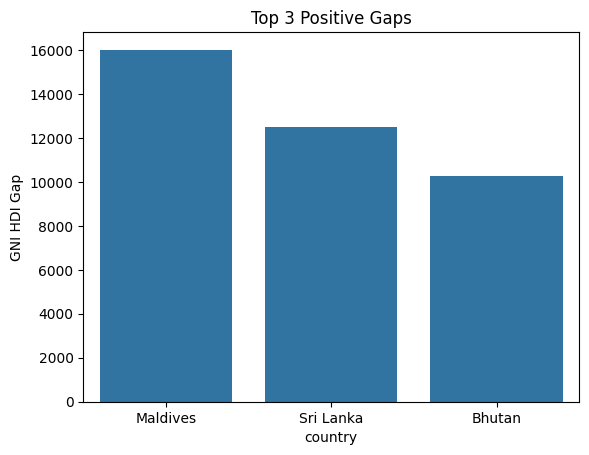

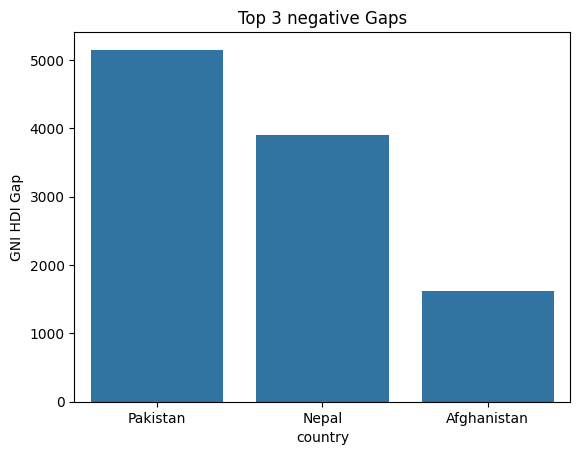

'this is becuase a country is economically rich but socially underdeveloped.\nincome is not effectively translated improvement into health, education, and others\n. there can be limited quality of education, health care or governance challenges.\nthis analysis reinforces the idea that economic growth alone is insufficient and must be acompained by social investment to\nimprove human development.\n'

In [ ]:
#5. Gap Analysis:
HDI_SAC['GNI HDI Gap']=HDI_SAC["gross_inc_percap"]-HDI_SAC["hdi"]
ranking= HDI_SAC.groupby('country')['GNI HDI Gap'].mean().sort_values(ascending=False)
postivie3= ranking.head(3)
negative3= ranking.tail(3)
print(f"top 3 positive gaps are \n {postivie3}")
print(f"top 3 negative gaps are \n {negative3}")
#there are no any negative values

# plotting graphs
sns.barplot(data=postivie3)
plt.title('Top 3 Positive Gaps')
plt.show()

sns.barplot(data=negative3)
plt.title('Top 3 negative Gaps')
plt.show()

#• Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.
'''this is becuase a country is economically rich but socially underdeveloped.
income is not effectively translated improvement into health, education, and others
. there can be limited quality of education, health care or governance challenges.
this analysis reinforces the idea that economic growth alone is insufficient and must be acompained by social investment to
improve human development.
'''


5 Problem 3
Comparative Regional Analysis: South Asia vs Middle East

saved sucessfully
mean    0.639583
std     0.098273
Name: hdi, dtype: float64
the mean of south asia is 0.6396
the mean of middle east is 0.7889
the std of south asia is 0.0983
the std of south asia is 0.1413

         Region  Mean HDI   Std HDI
0   South Asia  0.639583  0.098273
1  Middle East  0.788909  0.141295
middle east perform better in average
______________________________________________________________________
the top 3 countries of south asia are country
Sri Lanka    0.780000
Maldives     0.750667
Bhutan       0.677667
Name: hdi, dtype: float64
the least 3 countries of south asia are country
Nepal          0.595000
Pakistan       0.537667
Afghanistan    0.474333
Name: hdi, dtype: float64
the top 3 countries of middle east are country
United Arab Emirates    0.932667
Israel                  0.910667
Bahrain                 0.885333
Name: hdi, dtype: float64
the least 3 countries of middle east are country
Lebanon    0.730000
Iraq       0.667000
Yemen      0.426333
Name: hdi,

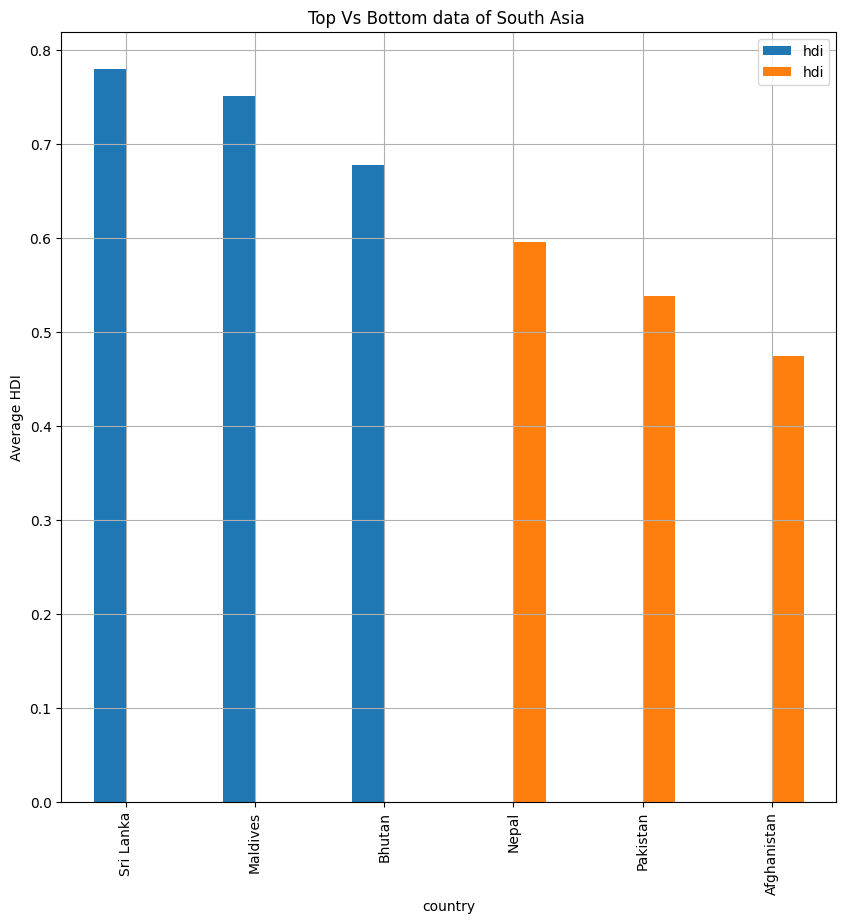

In [ ]:
#1. Create Middle East Subset:
middle_east= ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]
df3= pd.read_csv('/content/HDI problem1B.csv')
south_asia_df= df3[df3['country'].isin(south_asianCountry)]
middle_east_df= df3[df3['country'].isin(middle_east)]
south_asia_df.to_csv('HDI SouthAsia 2020 2022.csv',index=False)
middle_east_df.to_csv('HDI MiddleEast 2020 2022.csv',index=False)
print('saved sucessfully')

#2. Descriptive Statistics:
sa_stats = south_asia_df['hdi'].agg(['mean', 'std'])
print(sa_stats)

south_asia_mean=south_asia_df['hdi'].mean()
middle_east_mean=middle_east_df['hdi'].mean()
south_asia_std=south_asia_df['hdi'].std()
middle_east_std=middle_east_df['hdi'].std()
print(f"the mean of south asia is {south_asia_mean:.4f}")
print(f"the mean of middle east is {middle_east_mean:.4f}")
print(f"the std of south asia is {south_asia_std:.4f}")
print(f"the std of south asia is {middle_east_std:.4f}")


summary = pd.DataFrame({
    "Region": ["South Asia", "Middle East"],
    "Mean HDI": [south_asia_mean, middle_east_mean],
    "Std HDI": [south_asia_std, middle_east_std]
})
print(f'\n {summary}')
if middle_east_mean>south_asia_mean:
    print("middle east perform better in average")
else:
  print("\n south perform better in average")
print("______________________________________________________________________")
#Identify the top 3 and bottom 3 countries in each region based on HDI.
southasia_rank= south_asia_df.groupby('country')['hdi'].mean().sort_values(ascending=False)
middleeast_rank= middle_east_df.groupby('country')['hdi'].mean().sort_values(ascending=False)
southAsia_top= southasia_rank.head(3)
southAsia_bottom = southasia_rank.tail(3)
middleEast_top= middleeast_rank.head(3)
middleEast_bottom = middleeast_rank.tail(3)
print(f"the top 3 countries of south asia are {southAsia_top}")
print(f"the least 3 countries of south asia are {southAsia_bottom}")
print(f"the top 3 countries of middle east are {middleEast_top}")
print(f"the least 3 countries of middle east are {middleEast_bottom}")

#Create a bar chart comparing these top and bottom performers across the two regions.

compare_data= pd.concat([
    southAsia_top, southAsia_bottom,
],axis=1)
compare_data.plot(kind='bar', figsize=(10,10))
plt.title("Top Vs Bottom data of South Asia ")
plt.ylabel("Average HDI")
plt.grid()
plt.show()

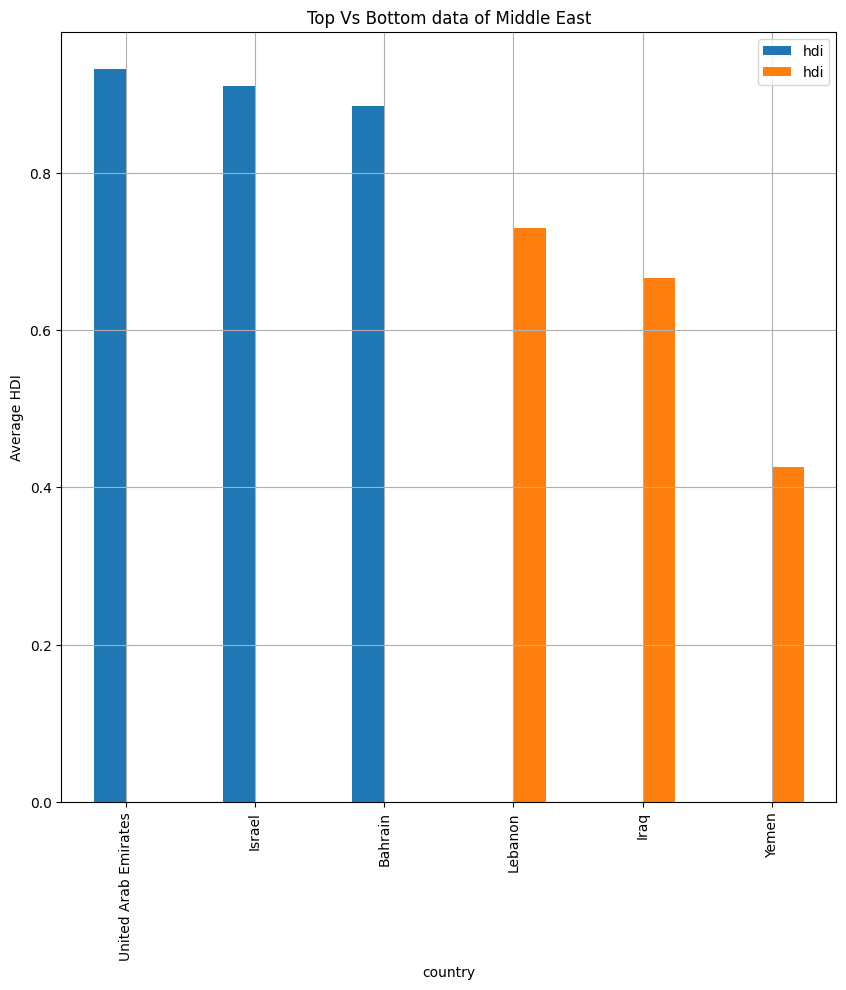

In [ ]:
#compare data of middle east
compare_data= pd.concat([
    middleEast_top, middleEast_bottom,
],axis=1)
compare_data.plot(kind='bar', figsize=(10,10))
plt.title("Top Vs Bottom data of Middle East")
plt.ylabel("Average HDI")
plt.grid()
plt.show()

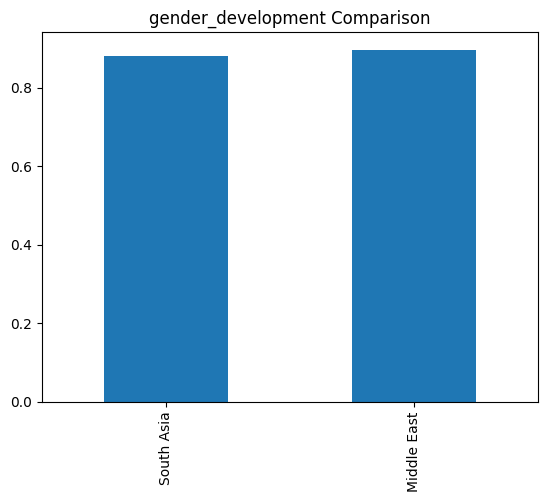

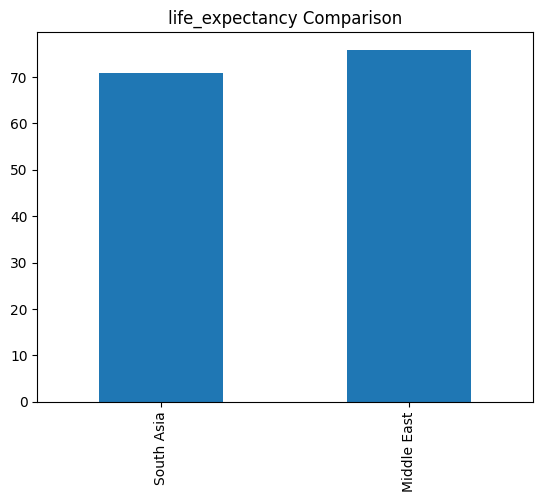

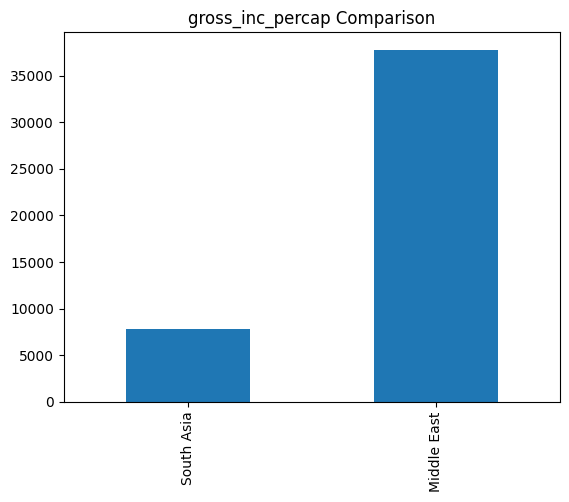

In [ ]:
#4. Metric Comparisons:
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']
for metric in metrics:
  values= {
      "South Asia":south_asia_df[metric].mean(),
      "Middle East":middle_east_df[metric].mean()

  }
  pd.Series(values).plot(kind='bar',title=f'{metric} Comparison')
  plt.show()


#• Identify which metric shows the greatest disparity between regions.
#gni per capita shows the greatest disparity


south asia range 0.3210
south asia cv 0.1537
middle east range 0.5130
middle east  cv 0.1791


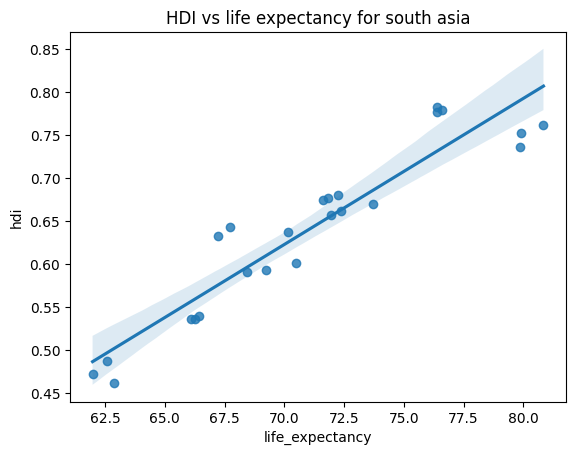

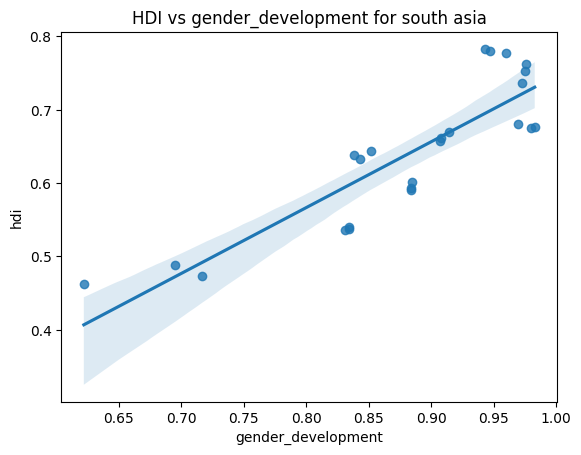

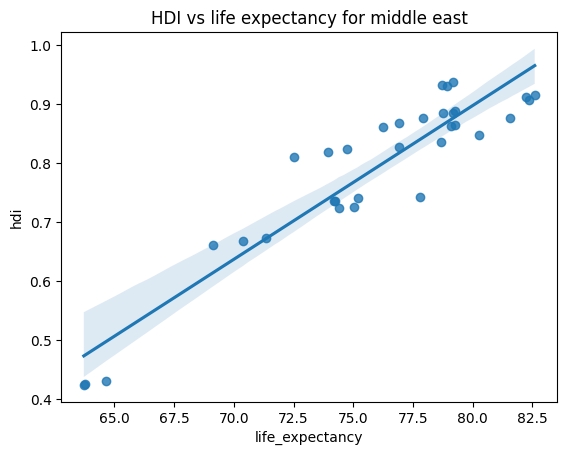

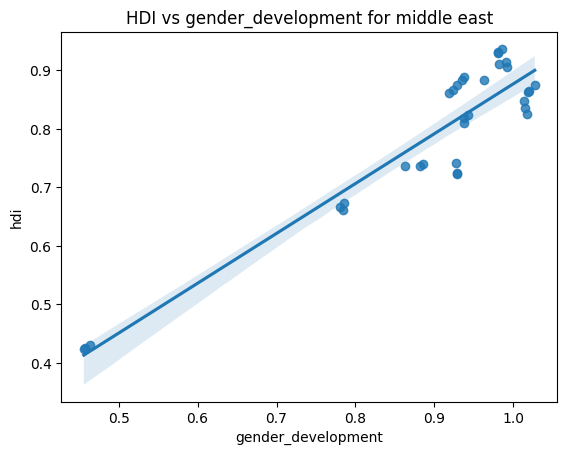


In both South Asia and the Middle East, HDI exhibits a positive relationship with 
life expectancy and gender development. The relationship between
 HDI and life expectancy is strong and positive, indicating that 
 improvements in health outcomes are closely associated with higher
  human development levels. In contrast, the relationship between 
  HDI and gender development, while still positive, is 
  comparatively weaker, suggesting that gender equality contributes
   to human development but to a lesser extent than life expectancy



In [ ]:
#5. HDI Disparity:
#for south asia
southAsia_range= south_asia_df['hdi'].max()-south_asia_df['hdi'].min()
southAsia_cv=  south_asia_df['hdi'].std()/south_asia_df['hdi'].mean()

#for middle east
middleEast_range= middle_east_df['hdi'].max()-middle_east_df['hdi'].min()
middleEast_cv=  middle_east_df['hdi'].std()/middle_east_df['hdi'].mean()

print(f"south asia range {southAsia_range:.4f}")
print(f"south asia cv {southAsia_cv:.4f}")
print(f"middle east range {middleEast_range:.4f}")
print(f"middle east  cv {middleEast_cv:.4f}")

#the middle east shows greater hdi disparity than south asia, as indicated by higher
# hdi range and coefficient of variance.

#6. Correlation Analysis:
southAsia_corr_gender=south_asia_df['hdi'].corr(south_asia_df['gender_development'])
southAsia_corr_life=south_asia_df['hdi'].corr(south_asia_df['life_expectancy'])

middleEast_corr_gender=middle_east_df['hdi'].corr(middle_east_df['gender_development'])
middleEast_corr_life=middle_east_df['hdi'].corr(middle_east_df['life_expectancy'])


#• Create scatter plots with trendlines for each correlation.
sns.regplot(data=south_asia_df , x='life_expectancy',y='hdi')
plt.title("HDI vs life expectancy for south asia")
plt.show()

sns.regplot(data=south_asia_df , x='gender_development',y='hdi')
plt.title("HDI vs gender_development for south asia")
plt.show()

sns.regplot(data=middle_east_df , x='life_expectancy',y='hdi')
plt.title("HDI vs life expectancy for middle east")
plt.show()

sns.regplot(data=middle_east_df , x='gender_development',y='hdi')
plt.title("HDI vs gender_development for middle east")
plt.show()


#• Interpret the strength and direction of these relationships.
print('''
In both South Asia and the Middle East, HDI exhibits a positive relationship with
life expectancy and gender development. The relationship between
 HDI and life expectancy is strong and positive, indicating that
 improvements in health outcomes are closely associated with higher
  human development levels. In contrast, the relationship between
  HDI and gender development, while still positive, is
  comparatively weaker, suggesting that gender equality contributes
   to human development but to a lesser extent than life expectancy
''')


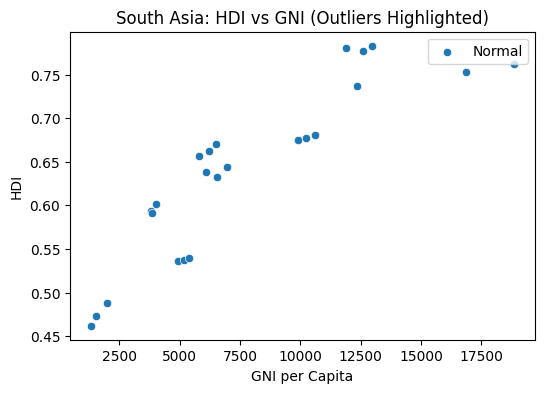

In [ ]:
#7. Outlier Detection:
#south asia hdi
sa_hdi_q1 = south_asia_df['hdi'].quantile(0.25)
sa_hdi_q3 = south_asia_df['hdi'].quantile(0.75)
sa_hdi_iqr = sa_hdi_q3 - sa_hdi_q1

sa_hdi_low = sa_hdi_q1 - 1.5 * sa_hdi_iqr
sa_hdi_up  = sa_hdi_q3 + 1.5 * sa_hdi_iqr

sa_hdi_outliers = south_asia_df[
    (south_asia_df['hdi'] < sa_hdi_low) |
    (south_asia_df['hdi'] > sa_hdi_up)
]

#south asia gni
sa_gni_q1 = south_asia_df['gross_inc_percap'].quantile(0.25)
sa_gni_q3 = south_asia_df['gross_inc_percap'].quantile(0.75)
sa_gni_iqr = sa_gni_q3 - sa_gni_q1

sa_gni_low = sa_gni_q1 - 1.5 * sa_gni_iqr
sa_gni_up  = sa_gni_q3 + 1.5 * sa_gni_iqr

sa_gni_outliers = south_asia_df[
    (south_asia_df['gross_inc_percap'] < sa_gni_low) |
    (south_asia_df['gross_inc_percap'] > sa_gni_up)
]



#middle east hdi
me_hdi_q1 = middle_east_df['hdi'].quantile(0.25)
me_hdi_q3 = middle_east_df['hdi'].quantile(0.75)
me_hdi_iqr = me_hdi_q3 - me_hdi_q1

me_hdi_low = me_hdi_q1 - 1.5 * me_hdi_iqr
me_hdi_up  = me_hdi_q3 + 1.5 * me_hdi_iqr

me_hdi_outliers = middle_east_df[
    (middle_east_df['hdi'] < me_hdi_low) |
    (middle_east_df['hdi'] > me_hdi_up)
]


#middle east gni
me_gni_q1 = middle_east_df['gross_inc_percap'].quantile(0.25)
me_gni_q3 = middle_east_df['gross_inc_percap'].quantile(0.75)
me_gni_iqr = me_gni_q3 - me_gni_q1

me_gni_low = me_gni_q1 - 1.5 * me_gni_iqr
me_gni_up  = me_gni_q3 + 1.5 * me_gni_iqr

me_gni_outliers = middle_east_df[
    (middle_east_df['gross_inc_percap'] < me_gni_low) |
    (middle_east_df['gross_inc_percap'] > me_gni_up)
]


#for south Asia
plt.figure(figsize=(6,4))

# Normal points
sns.scatterplot(
    data=south_asia_df,
    x='gross_inc_percap',
    y='hdi',
    label='Normal'
)

# HDI outliers
sns.scatterplot(
    data=sa_hdi_outliers,
    x='gross_inc_percap',
    y='hdi',
    color='red',
    label='HDI Outliers'
)

# GNI outliers
sns.scatterplot(
    data=sa_gni_outliers,
    x='gross_inc_percap',
    y='hdi',
    color='orange',
    label='GNI Outliers'
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs GNI (Outliers Highlighted)")
plt.legend()
plt.show()
